In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("customer_info.xlsx")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#  Univariate Analysis



In [5]:



def custom_summary(df): #parameters?? df = dataframe original data of mtcars
    
    result = []
    
    for col in df.columns:
        
        if df[col].dtype != 'O':
        
            stats = OrderedDict ({
                'Feature_Name' : col,
                'Count':df[col].count(),
                'Minimum':df[col].min(),
                'Quarter 1':df[col].quantile(0.25), 
                "Mean":df[col].mean(),
                'Median':df[col].median(),
                'Quarter 3':df[col].quantile(0.75),
                'Maximum':df[col].max(),
                "Variance":df[col].var(),
                'Standard Deviation':df[col].std(),
                "Kurtosis":df[col].kurt(),
                'Skewness':df[col].skew() ,
                'IQR':df[col].quantile(0.75) - df[col].quantile(0.25)
            })
            
            result.append(stats)
        
        
    result_df = pd.DataFrame(result)

    return result_df

In [6]:
custom_summary(df)

,Feature_Name,Count,Minimum,Quarter 1,Mean,Median,Quarter 3,Maximum,Variance,Standard Deviation,Kurtosis,Skewness,IQR
0,CustomerID,200,1,50.75,100.50,100.5,150.25,200,3350.000000,57.879185,-1.200000,0.000000,99.50
1,Age,200,18,28.75,38.85,36.0,49.00,70,195.133166,13.969007,-0.671573,0.485569,20.25
2,Annual Income (k$),200,15,41.50,60.56,61.5,78.00,137,689.835578,26.264721,-0.098487,0.321843,36.50
3,Spending Score (1-100),200,1,34.75,50.20,50.0,73.00,99,666.854271,25.823522,-0.826629,-0.047220,38.25


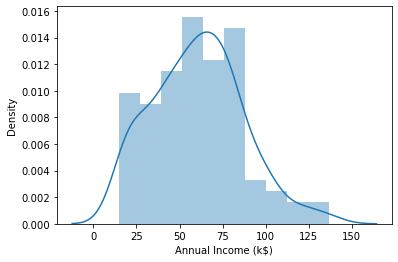

In [7]:
sns.distplot(df["Annual Income (k$)"]);

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# distrubtion plot for the features 

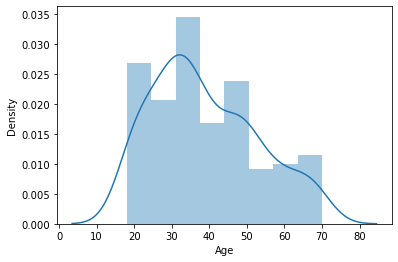

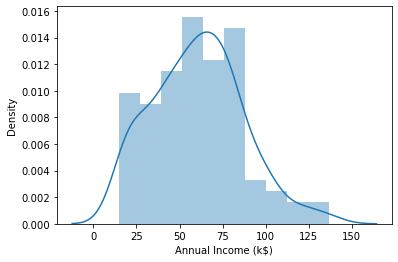

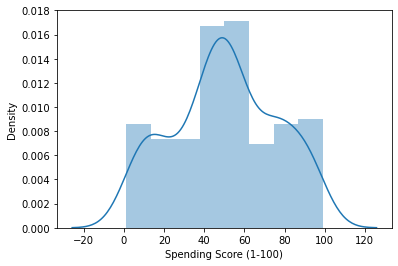

In [9]:
# running a for loop through the number columns in the dataframe

columns = [ 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for col in columns:
    plt.figure()    #to create different figure
    sns.distplot(df[col])

# KDE PLOT For the features with age as label

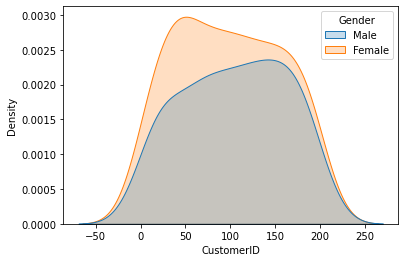

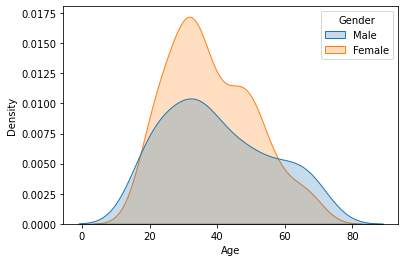

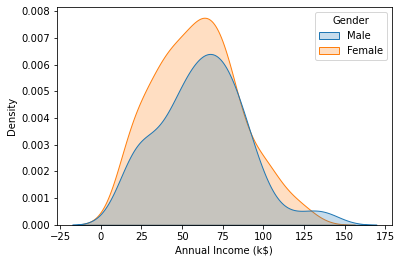

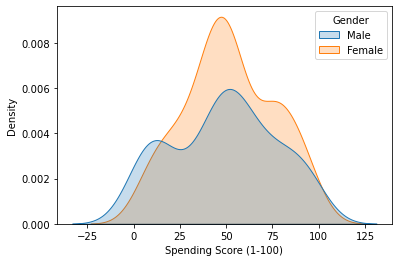

In [10]:
for col in df.columns:

    if df[col].dtype != 'O':

        plt.figure()
        sns.kdeplot(df[col],shade= True,hue= df["Gender"])

# applying boxplot 

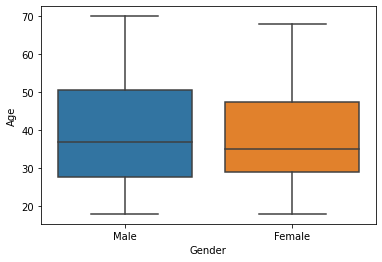

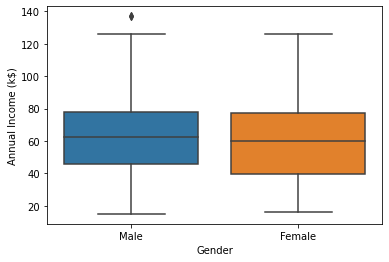

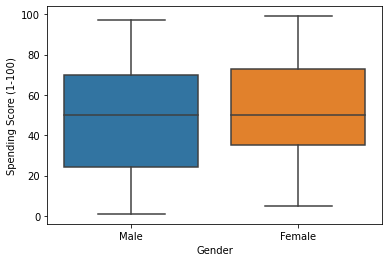

In [11]:
columns = [ 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for col in columns:

    plt.figure()

    sns.boxplot(data = df, x = 'Gender',y = df[col])

In [12]:
# checking what gender our data set has more

df["Gender"].value_counts(normalize= True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# bivariate analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

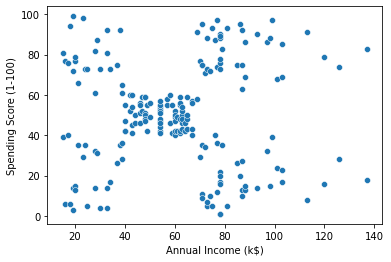

In [13]:
#this is generally done wih the help of scatter  plots

sns.scatterplot(data= df,x= 'Annual Income (k$)',y ='Spending Score (1-100)')

# There are bivariate clustering as we can see in the data

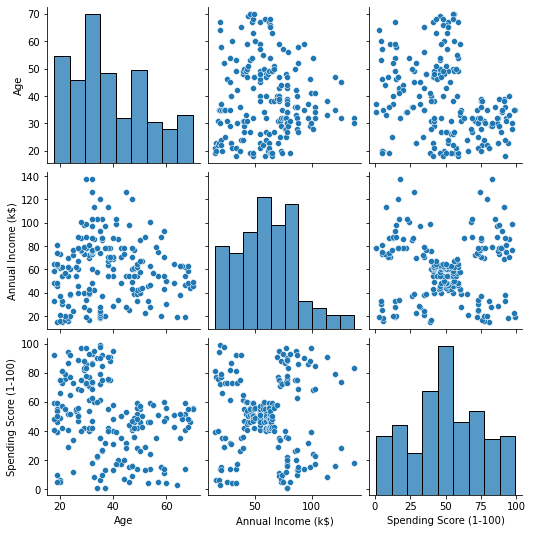

In [16]:
df1 = df.drop('CustomerID',axis= 1)
sns.pairplot(df1)